In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import scipy.stats as st

In [2]:
dataset = pd.read_csv('demand.csv')

In [3]:
noCovidDS = dataset.loc[dataset.covid ==0]

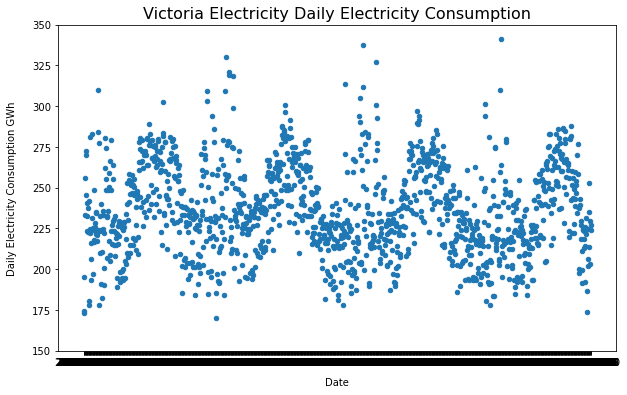

In [4]:
ax2 = dataset.plot.scatter(figsize=(10, 6), x='Date', y='Demand_GWh',ylim=(150,350))
plt.xlabel("Date", labelpad=10)
plt.ylabel("Daily Electricity Consumption GWh", labelpad=15)
plt.title("Victoria Electricity Daily Electricity Consumption", fontsize=16);
plt.show()

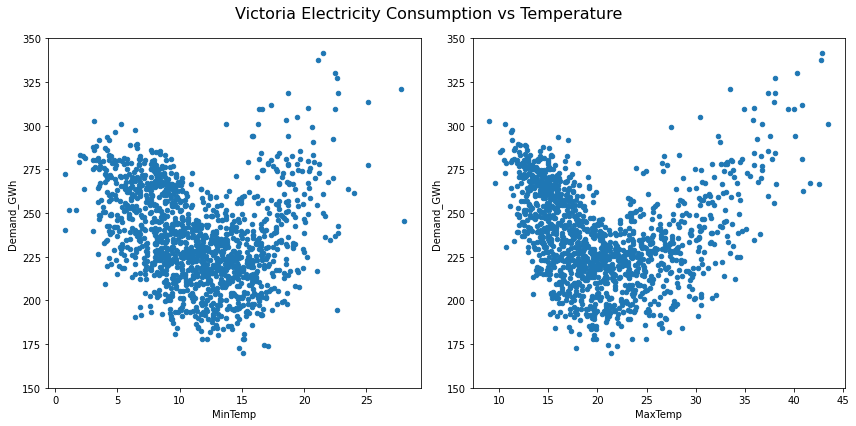

In [5]:

figure, axes = plt.subplots(1, 2)
dataset.plot.scatter(ax=axes[0], x='MinTemp', y='Demand_GWh',ylim=(150,350))
dataset.plot.scatter(ax=axes[1], x='MaxTemp', y='Demand_GWh',ylim=(150,350))
figure.set_figheight(6)
figure.set_figwidth(12)
figure.suptitle("Victoria Electricity Consumption vs Temperature", fontsize=16);
plt.tight_layout()

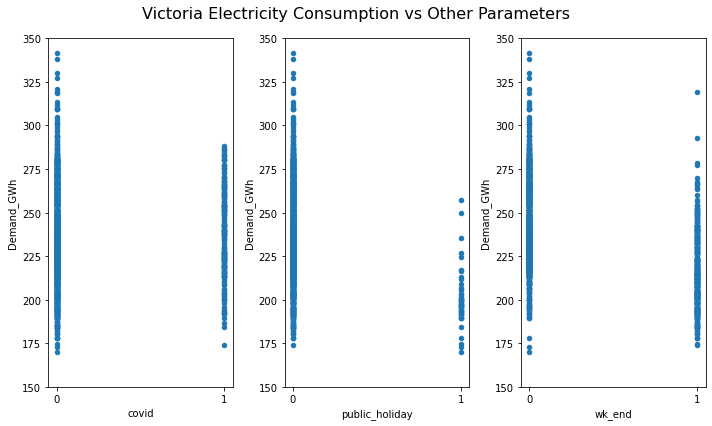

In [6]:
figure, axes = plt.subplots(1, 3)
dataset.plot.scatter(ax=axes[0], x='covid', y='Demand_GWh',ylim=(150,350))
dataset.plot.scatter(ax=axes[1], x='public_holiday', y='Demand_GWh',ylim=(150,350))
dataset.plot.scatter(ax=axes[2], x='wk_end', y='Demand_GWh',ylim=(150,350))
# plt.xticks(np.arange(0, 2))
plt.setp(axes, xticks=[0,1], xticklabels=['0', '1'])
figure.set_figheight(6)
figure.set_figwidth(10)
figure.suptitle("Victoria Electricity Consumption vs Other Parameters", fontsize=16);
plt.tight_layout()


Statistical Significance 

In [7]:
st.ttest_ind(dataset.loc[dataset.covid == 0]['Demand_GWh'].sample(n = 50), dataset.loc[dataset.covid == 1]['Demand_GWh'].sample(n = 50), equal_var=False)

Ttest_indResult(statistic=-1.097221916374927, pvalue=0.27523749522594776)

In [8]:
st.ttest_ind(dataset.loc[dataset.public_holiday == 0]['Demand_GWh'].sample(n = 20), dataset.loc[dataset.public_holiday == 1]['Demand_GWh'].sample(n = 20), equal_var=False)

Ttest_indResult(statistic=5.422315967954969, pvalue=4.256079055232819e-06)

In [9]:
st.ttest_ind(dataset.loc[dataset.wk_end == 0]['Demand_GWh'].sample(n = 50), dataset.loc[dataset.wk_end == 1]['Demand_GWh'].sample(n = 50), equal_var=False)

Ttest_indResult(statistic=5.899198262004722, pvalue=7.467457683404559e-08)

In [10]:
st.ttest_ind(dataset.loc[((dataset.MinTemp >= 5) & (dataset.MinTemp < 10)) ]['Demand_GWh'].sample(n = 50), dataset.loc[((dataset.MinTemp >= 10) & (dataset.MinTemp < 15))]['Demand_GWh'].sample(n = 50), equal_var=False)

Ttest_indResult(statistic=4.785571874052842, pvalue=6.035449390789325e-06)

In [11]:
st.ttest_ind(dataset.loc[((dataset.MaxTemp >= 10) & (dataset.MaxTemp < 15)) ]['Demand_GWh'].sample(n = 50), dataset.loc[((dataset.MaxTemp >= 15) & (dataset.MaxTemp < 20))]['Demand_GWh'].sample(n = 50), equal_var=False)

Ttest_indResult(statistic=6.843390645814408, pvalue=1.26875274993342e-09)

In [12]:
st.ttest_ind(dataset.loc[dataset.Population == 6244863]['Demand_GWh'].sample(n = 20), dataset.loc[dataset.Population == 6689377]['Demand_GWh'].sample(n = 20), equal_var=False)

Ttest_indResult(statistic=-1.2629401034271488, pvalue=0.21445627745149726)

# Electricity Demand Modelling

In [13]:
X = dataset[["MinTemp","MaxTemp","wk_end","public_holiday","Population","covid","year","month","day"]]
X2 = dataset[["MinTemp","MaxTemp","wk_end","public_holiday","Population","year","month","day"]]
y = dataset["Demand_GWh"].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, random_state=42)
print(X.shape, y.shape)

(1369, 9) (1369, 1)


In [14]:
X3 = noCovidDS[["MinTemp","MaxTemp","wk_end","public_holiday","Population","year","month","day"]]
y3 = noCovidDS["Demand_GWh"].values.reshape(-1, 1)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, random_state=42)

In [15]:
X_train.head()

,MinTemp,MaxTemp,wk_end,public_holiday,Population,covid,year,month,day
1117,12.9,22.6,0,0,6655284,0,2020,1,23
785,18.0,34.2,0,0,6528601,0,2019,2,25
96,12.7,26.2,0,0,6292584,0,2017,4,7
415,14.1,29.5,0,0,6387081,0,2018,2,20
350,15.7,24.5,1,0,6387081,0,2017,12,17


In [16]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
X_train_scaled = StandardScaler().fit_transform(X_train.values)
X_test_scaled = StandardScaler().fit_transform(X_test.values)
X2_train_scaled = StandardScaler().fit_transform(X2_train.values)
X2_test_scaled = StandardScaler().fit_transform(X2_test.values)
X3_train_scaled = StandardScaler().fit_transform(X3_train.values)
X3_test_scaled = StandardScaler().fit_transform(X3_test.values)

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [18]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train_scaled, y_train)
training_score = model.score(X_train_scaled, y_train)
testing_score = model.score(X_test_scaled, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.33589340101606846
Testing Score: 0.3849388307520464


In [19]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
predicted = model.predict(X_train_scaled)

# Score the prediction with mse and r2
mse = mean_squared_error(y_train, predicted)
r2 = r2_score(y_train, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 496.28987875761584
R-squared (R2 ): 0.33589340101606846


# SGD

In [20]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error

C:\ProgramData\Anaconda3\envs\PythonAdv\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


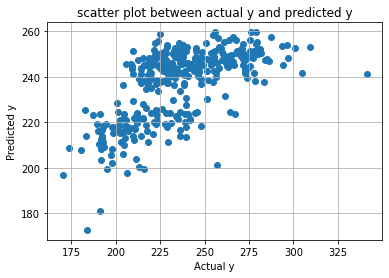

Mean Squared Error : 446.4327420644145
Mean Absolute Error : 17.359964232669515


In [21]:
# SkLearn SGD classifier
clf_ = SGDRegressor()
clf_.fit(X_train_scaled, y_train)
plt.scatter(y_test,clf_.predict(X_test_scaled))
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('scatter plot between actual y and predicted y')
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, clf_.predict(X_test_scaled)))
print('Mean Absolute Error :',mean_absolute_error(y_test, clf_.predict(X_test_scaled)))

# Deep Neural Network

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor

Using TensorFlow backend.


Nh = Ns/(α∗ (Ni + No))

Nh = Number of hidden layers.
Ni = number of input neurons.
No = number of output neurons.
Ns = number of samples in training data set.
α = an arbitrary scaling factor usually 2-10.

In [23]:
def create_model(optimizer='adam',input_dim=9):
    # Create model and add layers
    model = Sequential()

    # Adding the input layer and the first hidden layer
    # model.add(Dense(128, activation = 'relu', input_dim = 11))
    model.add(Dense(64, activation = 'relu', input_dim = input_dim))
    model.add(Dense(units = 64, activation = 'relu'))
    model.add(Dense(units = 64, activation = 'relu'))
    model.add(Dense(units = 64, activation = 'relu'))
    model.add(Dense(units = 64, activation = 'relu'))
    model.add(Dense(units = 64, activation = 'relu'))
    model.add(Dense(units = 64, activation = 'relu'))
    model.add(Dense(units = 64, activation = 'relu'))
    model.add(Dense(units = 64, activation = 'relu'))
    model.add(Dense(units = 64, activation = 'relu'))
    model.add(Dense(units = 64, activation = 'relu'))

    # Adding the output layer
    # model.add(Dense(units = 1))
    model.add(Dense(1, activation="relu"))
    # Compile and fit the model
    model.compile(loss="mean_squared_error", optimizer=optimizer)
    return model

#Commented the GridSearchCV after finding the best parameters
model = KerasRegressor(build_fn=create_model, verbose=0)

batch_size = [5, 6, 7, 8, 9, 10, 15, 20]
epochs = [10, 25, 50, 100, 200]
param_grid = dict(batch_size=batch_size, epochs=epochs,optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid)

grid_result = grid.fit(X_train_scaled, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

predictions = grid.predict(X_test_scaled)

from sklearn.metrics import r2_score
r2_score(y_test, predictions)

In [24]:
model1 = create_model()
history = model1.fit(
    X_train_scaled,
    y_train,
    epochs=200,
    batch_size = 6,
#     shuffle=True,
    verbose=1
)

Train on 1026 samples
Epoch 1/200
1026/1026 [==============================] - 2s 2ms/sample - loss: 10962.7279
Epoch 2/200
1026/1026 [==============================] - 0s 302us/sample - loss: 537.5614
Epoch 3/200
1026/1026 [==============================] - 0s 301us/sample - loss: 298.6084
Epoch 4/200
1026/1026 [==============================] - 0s 285us/sample - loss: 204.3914
Epoch 5/200
1026/1026 [==============================] - 0s 295us/sample - loss: 197.0322
Epoch 6/200
1026/1026 [==============================] - 0s 308us/sample - loss: 196.3786
Epoch 7/200
1026/1026 [==============================] - 0s 313us/sample - loss: 166.2899
Epoch 8/200
1026/1026 [==============================] - 0s 310us/sample - loss: 172.7685
Epoch 9/200
1026/1026 [==============================] - 0s 309us/sample - loss: 181.2906
Epoch 10/200
1026/1026 [==============================] - 0s 305us/sample - loss: 162.5876
Epoch 11/200
1026/1026 [==============================] - 0s 275us/sample - l

1026/1026 [==============================] - 0s 299us/sample - loss: 76.0108
Epoch 92/200
1026/1026 [==============================] - 0s 289us/sample - loss: 70.5470
Epoch 93/200
1026/1026 [==============================] - 0s 338us/sample - loss: 83.6654
Epoch 94/200
1026/1026 [==============================] - 0s 286us/sample - loss: 67.8086
Epoch 95/200
1026/1026 [==============================] - 0s 317us/sample - loss: 57.4696
Epoch 96/200
1026/1026 [==============================] - 0s 293us/sample - loss: 61.2132
Epoch 97/200
1026/1026 [==============================] - 0s 300us/sample - loss: 58.2626
Epoch 98/200
1026/1026 [==============================] - 0s 294us/sample - loss: 81.1999
Epoch 99/200
1026/1026 [==============================] - 0s 293us/sample - loss: 77.7269
Epoch 100/200
1026/1026 [==============================] - 0s 283us/sample - loss: 77.7167
Epoch 101/200
1026/1026 [==============================] - 0s 296us/sample - loss: 57.4083
Epoch 102/200
1026/10

1026/1026 [==============================] - 0s 280us/sample - loss: 36.6817
Epoch 182/200
1026/1026 [==============================] - 0s 274us/sample - loss: 30.5306
Epoch 183/200
1026/1026 [==============================] - 0s 340us/sample - loss: 29.7146
Epoch 184/200
1026/1026 [==============================] - 0s 265us/sample - loss: 27.3257
Epoch 185/200
1026/1026 [==============================] - 0s 316us/sample - loss: 32.9262
Epoch 186/200
1026/1026 [==============================] - 0s 293us/sample - loss: 38.3503
Epoch 187/200
1026/1026 [==============================] - 0s 265us/sample - loss: 36.2439
Epoch 188/200
1026/1026 [==============================] - 0s 273us/sample - loss: 34.5419
Epoch 189/200
1026/1026 [==============================] - 0s 262us/sample - loss: 37.6091
Epoch 190/200
1026/1026 [==============================] - 0s 280us/sample - loss: 42.6935
Epoch 191/200
1026/1026 [==============================] - 0s 271us/sample - loss: 41.6906
Epoch 192/200

In [25]:
model2 = create_model(input_dim=8)
history = model2.fit(
    X2_train_scaled,
    y2_train,
    epochs=200,
    batch_size = 6,
#     shuffle=True,
    verbose=1
)

Train on 1026 samples
Epoch 1/200
1026/1026 [==============================] - 1s 897us/sample - loss: 11096.9201
Epoch 2/200
1026/1026 [==============================] - 0s 299us/sample - loss: 566.3431
Epoch 3/200
1026/1026 [==============================] - 0s 296us/sample - loss: 349.9435
Epoch 4/200
1026/1026 [==============================] - 0s 376us/sample - loss: 277.0482
Epoch 5/200
1026/1026 [==============================] - 0s 277us/sample - loss: 210.4213
Epoch 6/200
1026/1026 [==============================] - 0s 333us/sample - loss: 200.6225
Epoch 7/200
1026/1026 [==============================] - 0s 294us/sample - loss: 163.7641
Epoch 8/200
1026/1026 [==============================] - 0s 298us/sample - loss: 180.7535
Epoch 9/200
1026/1026 [==============================] - 0s 305us/sample - loss: 154.2235
Epoch 10/200
1026/1026 [==============================] - 0s 317us/sample - loss: 129.6992
Epoch 11/200
1026/1026 [==============================] - 0s 285us/sample -

1026/1026 [==============================] - 0s 306us/sample - loss: 81.5632
Epoch 92/200
1026/1026 [==============================] - 0s 326us/sample - loss: 72.2784
Epoch 93/200
1026/1026 [==============================] - 0s 292us/sample - loss: 100.0560
Epoch 94/200
1026/1026 [==============================] - 0s 284us/sample - loss: 71.2742
Epoch 95/200
1026/1026 [==============================] - 0s 290us/sample - loss: 77.2477
Epoch 96/200
1026/1026 [==============================] - 0s 282us/sample - loss: 68.1430
Epoch 97/200
1026/1026 [==============================] - 0s 286us/sample - loss: 66.8083
Epoch 98/200
1026/1026 [==============================] - 0s 294us/sample - loss: 71.8181
Epoch 99/200
1026/1026 [==============================] - 0s 292us/sample - loss: 66.5771
Epoch 100/200
1026/1026 [==============================] - 0s 288us/sample - loss: 65.3768
Epoch 101/200
1026/1026 [==============================] - 0s 300us/sample - loss: 60.1019
Epoch 102/200
1026/1

1026/1026 [==============================] - 0s 273us/sample - loss: 35.1916
Epoch 182/200
1026/1026 [==============================] - 0s 274us/sample - loss: 45.3319
Epoch 183/200
1026/1026 [==============================] - 0s 273us/sample - loss: 44.0818
Epoch 184/200
1026/1026 [==============================] - 0s 268us/sample - loss: 37.6291
Epoch 185/200
1026/1026 [==============================] - 0s 266us/sample - loss: 37.9986
Epoch 186/200
1026/1026 [==============================] - 0s 268us/sample - loss: 45.0307
Epoch 187/200
1026/1026 [==============================] - 0s 276us/sample - loss: 42.6127
Epoch 188/200
1026/1026 [==============================] - 0s 276us/sample - loss: 35.2720
Epoch 189/200
1026/1026 [==============================] - 0s 278us/sample - loss: 34.3214
Epoch 190/200
1026/1026 [==============================] - 0s 285us/sample - loss: 56.7272
Epoch 191/200
1026/1026 [==============================] - 0s 273us/sample - loss: 45.2976
Epoch 192/200

In [26]:
model3 = create_model(input_dim=8)
history = model3.fit(
    X3_train_scaled,
    y3_train,
    epochs=200,
    batch_size = 6,
#     shuffle=True,
    verbose=1
)

Train on 882 samples
Epoch 1/200
882/882 [==============================] - 1s 897us/sample - loss: 13626.6939s - loss: 13804.462
Epoch 2/200
882/882 [==============================] - 0s 290us/sample - loss: 721.0533
Epoch 3/200
882/882 [==============================] - 0s 294us/sample - loss: 433.4782
Epoch 4/200
882/882 [==============================] - 0s 282us/sample - loss: 339.2790
Epoch 5/200
882/882 [==============================] - 0s 289us/sample - loss: 257.6502
Epoch 6/200
882/882 [==============================] - 0s 284us/sample - loss: 260.0087
Epoch 7/200
882/882 [==============================] - 0s 281us/sample - loss: 193.6223
Epoch 8/200
882/882 [==============================] - 0s 279us/sample - loss: 176.2085
Epoch 9/200
882/882 [==============================] - 0s 298us/sample - loss: 180.6844
Epoch 10/200
882/882 [==============================] - 0s 283us/sample - loss: 173.1737
Epoch 11/200
882/882 [==============================] - 0s 320us/sample - los

882/882 [==============================] - 0s 296us/sample - loss: 61.3444
Epoch 93/200
882/882 [==============================] - 0s 278us/sample - loss: 81.6275
Epoch 94/200
882/882 [==============================] - 0s 280us/sample - loss: 64.5292
Epoch 95/200
882/882 [==============================] - 0s 298us/sample - loss: 75.8788
Epoch 96/200
882/882 [==============================] - 0s 284us/sample - loss: 65.5912
Epoch 97/200
882/882 [==============================] - 0s 309us/sample - loss: 79.6685
Epoch 98/200
882/882 [==============================] - 0s 280us/sample - loss: 59.7817
Epoch 99/200
882/882 [==============================] - 0s 287us/sample - loss: 71.4354
Epoch 100/200
882/882 [==============================] - 0s 279us/sample - loss: 65.0212
Epoch 101/200
882/882 [==============================] - 0s 282us/sample - loss: 65.5223
Epoch 102/200
882/882 [==============================] - 0s 275us/sample - loss: 76.1395
Epoch 103/200
882/882 [===================

882/882 [==============================] - 0s 276us/sample - loss: 41.7330
Epoch 185/200
882/882 [==============================] - 0s 263us/sample - loss: 36.9703
Epoch 186/200
882/882 [==============================] - 0s 269us/sample - loss: 34.6050
Epoch 187/200
882/882 [==============================] - 0s 272us/sample - loss: 35.3101
Epoch 188/200
882/882 [==============================] - 0s 265us/sample - loss: 25.6648
Epoch 189/200
882/882 [==============================] - 0s 263us/sample - loss: 26.0371
Epoch 190/200
882/882 [==============================] - 0s 265us/sample - loss: 29.0046
Epoch 191/200
882/882 [==============================] - 0s 267us/sample - loss: 24.0447
Epoch 192/200
882/882 [==============================] - 0s 266us/sample - loss: 39.2556
Epoch 193/200
882/882 [==============================] - 0s 265us/sample - loss: 28.5806
Epoch 194/200
882/882 [==============================] - 0s 276us/sample - loss: 27.4078
Epoch 195/200
882/882 [============

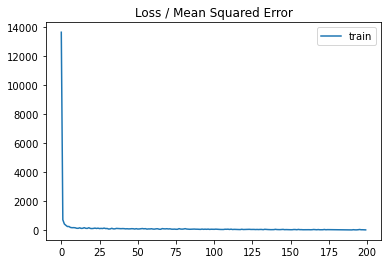

In [27]:
# plot loss during training
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.show()

In [28]:
y_pred = model1.predict(X_test_scaled)
r2_score(y_test, y_pred)

0.8355388615573656

In [29]:
# withiout covid as a parameter
y2_pred = model2.predict(X2_test_scaled)
r2_score(y2_test, y2_pred)

0.8532339294558834

In [30]:
y3_pred = model3.predict(X3_test_scaled)
r2_score(y3_test, y3_pred)

0.7935081541029678

In [31]:
y_train_pred = model1.predict(X_train_scaled)
r2_score(y_train, y_train_pred)

0.9753771079265232

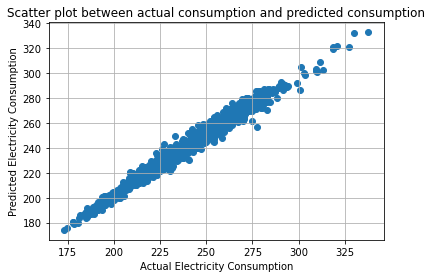

Mean Squared Error : 120.14826858893709
Mean Absolute Error : 8.16171661384783


In [32]:
plt.scatter(y_train,model1.predict(X_train_scaled))
plt.grid()
plt.xlabel('Actual Electricity Consumption')
plt.ylabel('Predicted Electricity Consumption')
plt.title('Scatter plot between actual consumption and predicted consumption')
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, model1.predict(X_test_scaled)))
print('Mean Absolute Error :',mean_absolute_error(y_test, model1.predict(X_test_scaled)))


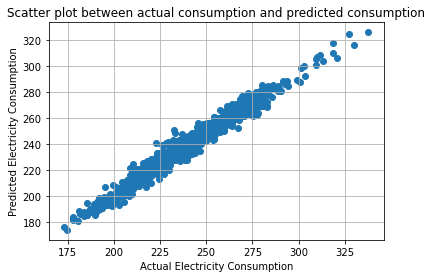

Mean Squared Error : 107.22100935491338
Mean Absolute Error : 7.919022761920899


In [33]:
plt.scatter(y2_train,model2.predict(X2_train_scaled))
plt.grid()
plt.xlabel('Actual Electricity Consumption')
plt.ylabel('Predicted Electricity Consumption')
plt.title('Scatter plot between actual consumption and predicted consumption')
plt.show()
print('Mean Squared Error :',mean_squared_error(y2_test, model2.predict(X2_test_scaled)))
print('Mean Absolute Error :',mean_absolute_error(y2_test, model2.predict(X2_test_scaled)))

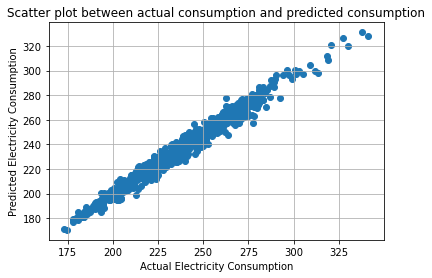

Mean Squared Error : 149.86368701408824
Mean Absolute Error : 9.399033950095664


In [34]:
plt.scatter(y3_train,model3.predict(X3_train_scaled))
plt.grid()
plt.xlabel('Actual Electricity Consumption')
plt.ylabel('Predicted Electricity Consumption')
plt.title('Scatter plot between actual consumption and predicted consumption')
plt.show()
print('Mean Squared Error :',mean_squared_error(y3_test, model3.predict(X3_test_scaled)))
print('Mean Absolute Error :',mean_absolute_error(y3_test, model3.predict(X3_test_scaled)))

In [35]:
model_loss = model1.evaluate(X_train_scaled, y_train, verbose=1)
# print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

1026/1026 [==============================] - 0s 285us/sample - loss: 18.4008


In [36]:

diff = y_pred - y_test
percentDiff = (diff / y_test) * 100
absPercentDiff = np.abs(percentDiff)
# compute the mean and standard deviation of the absolute percentage
# difference
mean = np.mean(absPercentDiff)
std = np.std(absPercentDiff)
print("[INFO] mean of the absolute percentage difference: {:.2f}%, std of the absolute percentage difference: {:.2f}%".format(mean, std))

[INFO] mean of the absolute percentage difference: 3.55%, std of the absolute percentage difference: 3.29%


In [37]:
diff = y2_pred - y2_test
percentDiff = (diff / y2_test) * 100
absPercentDiff = np.abs(percentDiff)
# compute the mean and standard deviation of the absolute percentage
# difference
mean2 = np.mean(absPercentDiff)
std2 = np.std(absPercentDiff)
print("[INFO] mean of the absolute percentage difference: {:.2f}%, std of the absolute percentage difference: {:.2f}%".format(mean2, std2))

[INFO] mean of the absolute percentage difference: 3.44%, std of the absolute percentage difference: 2.98%


In [38]:
diff = y3_pred - y3_test
percentDiff = (diff / y3_test) * 100
absPercentDiff = np.abs(percentDiff)
# compute the mean and standard deviation of the absolute percentage
# difference
mean3 = np.mean(absPercentDiff)
std3 = np.std(absPercentDiff)
print("[INFO] mean of the absolute percentage difference: {:.2f}%, std of the absolute percentage difference: {:.2f}%".format(mean3, std3))

[INFO] mean of the absolute percentage difference: 4.01%, std of the absolute percentage difference: 3.23%


In [39]:
y_test_df= pd.DataFrame(y2_test,columns= {'demand'})


In [40]:
X2_test = X2_test.reset_index()
df = pd.merge(X2_test, y_test_df, left_index=True, right_index=True)


In [41]:
y_pred_df= pd.DataFrame(y2_pred,columns= {'demand_prediction'})

In [42]:
df_demand = pd.merge(df, y_pred_df, left_index=True, right_index=True)

In [43]:
df_demand['date'] = pd.to_datetime(df[['year', 'month', 'day']])
df_demand['Prediction_Variation'] = df_demand['demand_prediction'] - df_demand['demand']

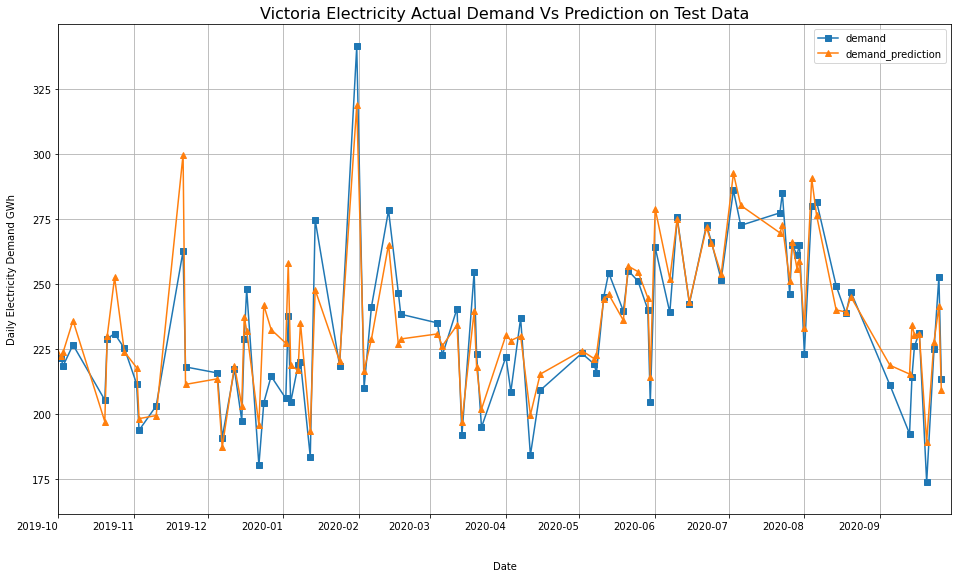

In [50]:
styles=['s-', '^-']
df_demand.plot.line(figsize=(16, 10),x="date", y=["demand", "demand_prediction"],rot=0,style=styles, xlim=('2019-10-01','2020-09-30'))
plt.xlabel("Date", labelpad=30)
plt.ylabel("Daily Electricity Demand GWh", labelpad=15)
plt.title("Victoria Electricity Actual Demand Vs Prediction on Test Data", fontsize=16);
plt.grid()
plt.show()

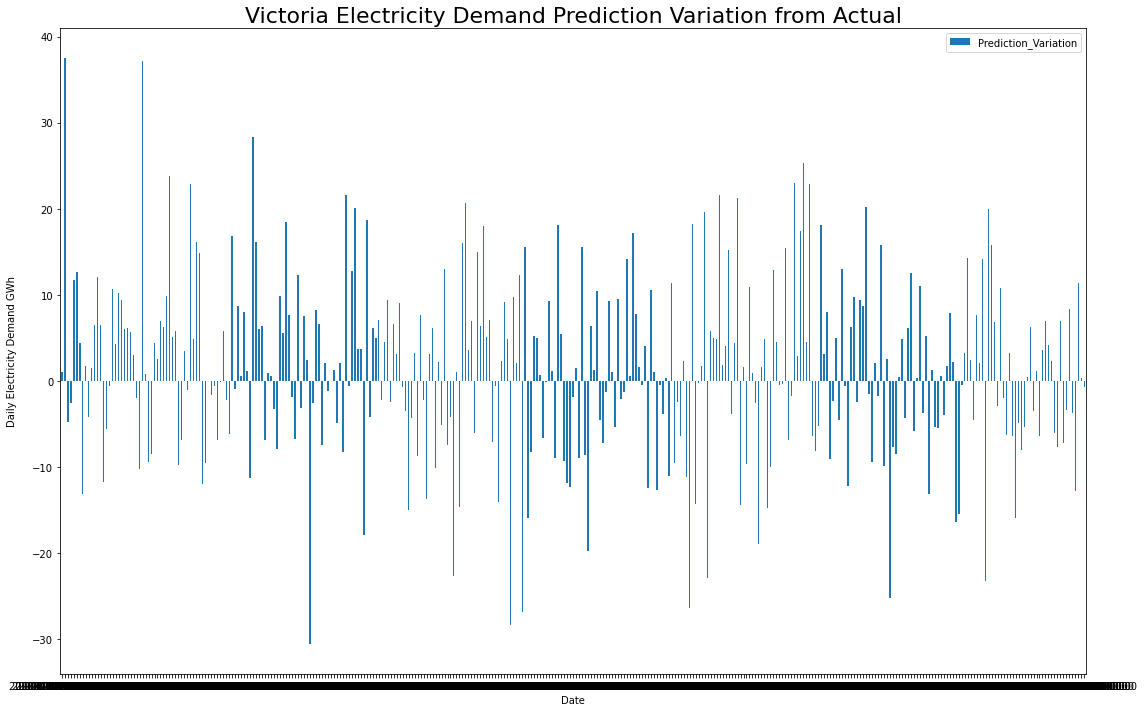

In [45]:
df_demand.plot.bar(figsize=(16, 10),x="date", y=["Prediction_Variation"])
plt.xlabel("Date")
plt.xticks(rotation='horizontal')
plt.ylabel("Daily Electricity Demand GWh", labelpad=15)
plt.title("Victoria Electricity Demand Prediction Variation from Actual", fontsize=22);
plt.tight_layout()
plt.show()